##A Comparative Study of Fashion Item Classification Using Sequential Models and Convolutional Neural Networks

`This project investigates the classification of fashion items using the Fashion MNIST dataset, comparing the performance of a simple Sequential Model with that of a Convolutional Neural Network (CNN). With 60,000 training images and 10,000 test images spanning 10 fashion categories, the study aims to elucidate the efficacy of these two approaches in terms of accuracy, computational efficiency, and scalability. By analyzing their performance metrics and training dynamics, the project contributes to the discourse on sequential models versus CNNs in image classification tasks, providing insights valuable for practitioners and researchers alike.`

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#Getting dataset form keras library

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
# Normalize the pixel values
train_images = train_images / 255.0
test_images = test_images / 255.0

#Visualizing instance of data

Label: 9

Image Pixel Array:
 [[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.

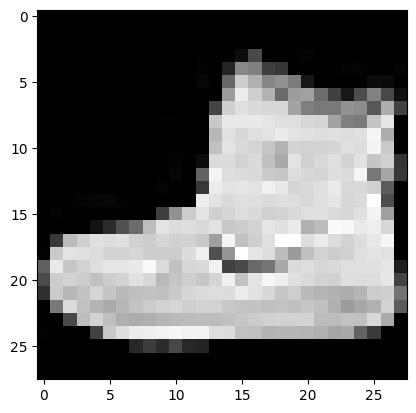

In [7]:
index = 0
np.set_printoptions(linewidth= 500)
print(f'Label: {train_labels[index]}')
print(f'\nImage Pixel Array:\n {train_images[index]}')
plt.imshow(train_images[index], cmap='gray')

##Callback Function

In [8]:
#callback function to limit epochs after getting 90% accuracy
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.9):
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

##Sequential Model

In [9]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(512, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.fit(train_images, train_labels, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4724 - accuracy: 0.8301
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3585 - accuracy: 0.8678
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3224 - accuracy: 0.8804
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2968 - accuracy: 0.8893
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2805 - accuracy: 0.8950
Epoch 6/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.2653 - accuracy: 0.9004
Reached 90% accuracy so cancelling training!
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2652 - accuracy: 0.9004


In [12]:
model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


array([[7.5349442e-09, 3.0148662e-08, 1.6901032e-08, ..., 1.2113256e-02, 1.1201598e-07, 9.7534013e-01],
       [3.0068861e-08, 1.3892473e-13, 9.9969578e-01, ..., 2.4216666e-18, 4.0775534e-12, 8.8474888e-17],
       [2.8559563e-10, 1.0000000e+00, 1.6874004e-12, ..., 2.3538275e-19, 1.5026125e-12, 7.0152283e-20],
       ...,
       [3.4797624e-05, 4.2738457e-09, 9.6344247e-06, ..., 2.9564158e-06, 9.9987042e-01, 1.0437214e-09],
       [2.0056078e-11, 9.9999940e-01, 2.3778760e-13, ..., 1.7556898e-15, 1.1171910e-09, 7.0075893e-16],
       [7.9999365e-05, 2.9666448e-06, 1.4520275e-04, ..., 1.5260818e-04, 2.0809472e-04, 2.5902916e-06]], dtype=float32)

In [13]:
#traninig vs testing accuracy

train_loss, train_accuracy = model.evaluate(train_images, train_labels)
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print(f"Train accuracy: {train_accuracy:.2f}")
print(f"Test accuracy: {test_accuracy:.2f}")


313/313 [==============================] - 1s 3ms/step - loss: 0.3437 - accuracy: 0.8790
Train accuracy: 0.91
Test accuracy: 0.88


##CNN

In [14]:
class cnnCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.98):
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True

cnncallbacks = cnnCallback()

In [15]:
cnn = keras.Sequential([
    #add convolutional and maxpooling layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    #add remaining layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
# Print the model summary
model.summary()

# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(train_images, train_labels, epochs=10, callbacks = [cnncallbacks])

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 468874 (1.79 MB)
Trainable params: 468874 (1.79 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

MODEL TRAINING:
Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2536 - accuracy: 0.9047
Epoch 2/10
1875/1875 [===========

In [16]:
#training and testing accuracy

train_loss, train_accuracy = model.evaluate(train_images, train_labels)
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print(f"Train accuracy: {train_accuracy:.2f}")
print(f"Test accuracy: {test_accuracy:.2f}")


313/313 [==============================] - 1s 2ms/step - loss: 0.3548 - accuracy: 0.8872
Train accuracy: 0.94
Test accuracy: 0.89


In comparing the performances of a simple neural network (NN) and a Convolutional Neural Network (CNN), both models demonstrate strong classification capabilities on the Fashion MNIST dataset. The simple NN achieves a respectable training accuracy of 91% and a test accuracy of 88%, indicating solid generalization to unseen data. Meanwhile, the CNN exhibits slightly higher accuracies with a training accuracy of 94% and a test accuracy of 89%. This marginal improvement suggests that the CNN architecture, tailored for image processing tasks, can effectively capture spatial hierarchies and feature representations within the fashion images, leading to slightly enhanced performance. However, both models showcase robustness and reliability in fashion item classification, underscoring the versatility of neural network architectures in tackling image recognition tasks.